## **i. Mount google drive**
---

In [65]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **ii. Import the libraries**
---

In [66]:
import cv2
import sys
import os
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

print("Versions of key libraries")
print("---")
print("cv2:       ", cv2.__version__)
print("numpy:     ", np.__version__)
print("matplotlib:", matplotlib.__version__)
print("pandas.   :", pd.__version__)


Versions of key libraries
---
cv2:        4.1.2
numpy:      1.19.5
matplotlib: 3.2.2
pandas.   : 1.1.5


## **iii. Append /iss/vse/data/ in your python path**
---

In [67]:
sys.path.append('/content/gdrive/My Drive/iss/vse/data/')
print("All the system paths:")
sys.path

All the system paths:


['',
 '/content',
 '/env/python',
 '/usr/lib/python37.zip',
 '/usr/lib/python3.7',
 '/usr/lib/python3.7/lib-dynload',
 '/usr/local/lib/python3.7/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.7/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/',
 '/content/gdrive/My Drive/iss/vse/data/']

## **iv. Change working directory to /iss/vse/data/**
---

In [68]:
os.chdir('/content/gdrive/My Drive/iss/vse/data/')
print("Current working directory:")
os.getcwd()

Current working directory:


'/content/gdrive/My Drive/iss/vse/data'

## **v. Define `cv2plt` for image display**
---

In [69]:
def cv2plt(img):
    plt.figure(figsize=(8,8))        # To change the size of figure
    plt.axis('off')
    if np.size(img.shape) == 3:
        plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    else:
        plt.imshow(img,cmap='gray',vmin=0,vmax=255)  
    plt.show()

print(cv2plt)

<function cv2plt at 0x7f392de330e0>


## **vi. Setup YOLO v3**
---

In [70]:
lbl_file        = 'yolov3.txt'
classes         = open(lbl_file).read().strip().split("\n")

                                                # Read in the deep learning net
yoloconfig      = 'yolov3.cfg'
yoloweights     = 'yolov3.weights'
net             = cv2.dnn.readNet(yoloweights,yoloconfig)

pd.DataFrame(classes)                           # Display the first five and the last five classes

,0
0,person
1,bicycle
2,car
3,motorcycle
4,airplane
...,...
75,vase
76,scissors
77,teddy bear
78,hair drier


## **Question a**
---
Create a function that receives an image and returns bounding boxes and their corresponding class labels. The function should have the below signature:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp;`def yoloV3Detect(img,scFactor=1/255,nrMean=(0,0,0),RBSwap=True,scoreThres=0.5,nmsThres=0.4)`<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`...`

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;`return [fboxes,fclasses]`<br><br>


Try to perform object detections on image 'sr1.jpg', 'sr2.jpg' and etc.

In [71]:
# Type your code below

def yoloV3Detect(img,scFactor=1/255,nrMean=(0,0,0),RBSwap=True,scoreThres=0.5,nmsThres=0.4):

  ######################### Read Image ##########################
  img = cv2.imread(img)
  cv2plt(img)
  
  ########################## Create blob #########################
  blob = cv2.dnn.blobFromImage(image=img, 
                              scalefactor=scFactor, 
                              size=(416, 416), 
                              mean=nrMean, 
                              swapRB=RBSwap, 
                              crop=False)
  
  ########################## Prediction ############################
  def getOutputLayers(net): 
    layers = net.getLayerNames() 
    outLayers = [layers[i[0] - 1] for i in net.getUnconnectedOutLayers()] 
    return outLayers

  net.setInput(blob) 
  outLyrs = getOutputLayers(net) 
  preds = net.forward(outLyrs)

  ############### Extract information from the output ###############
  imgHeight = img.shape[0]
  imgWidth = img.shape[1]

  classId = [] 
  confidences = [] 
  boxes = []

  for scale in preds: 
    for pred in scale: 
      scores = pred[5:] 
      clss = np.argmax(scores) 
      confidence = scores[clss]

      if confidence > 0.5: 
        xc = int(pred[0]*imgWidth) 
        yc = int(pred[1]*imgHeight) 
        w = int(pred[2]*imgWidth) 
        h = int(pred[3]*imgHeight) 
        x = xc - w/2
        y = yc - h/2
        
        classId.append(clss) 
        confidences.append(float(confidence)) 
        boxes.append([x, y, w, h])
  
  ############### Non-maximal suppresion (NMS) #####################
  scoreThres = scoreThres
  nmsThres = nmsThres
  selected = cv2.dnn.NMSBoxes(bboxes=boxes, 
                              scores=confidences, 
                              score_threshold=scoreThres, 
                              nms_threshold=nmsThres)
  
  fboxes = [boxes[j] for j in selected[:,0]]
  fclasses = [str(classes[classId[j]]) for j in selected[:,0]] 
  return [fboxes,fclasses]

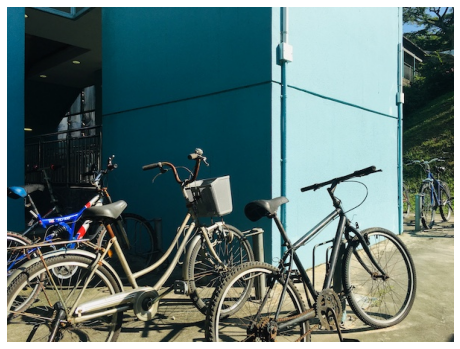

([[258.5, 215.5, 295, 227],
  [3.5, 191.0, 341, 262],
  [536.0, 198.5, 62, 103],
  [4.5, 207.5, 137, 113]],
 ['bicycle', 'bicycle', 'bicycle', 'bicycle'])

In [72]:
fboxes,fclasses=yoloV3Detect('sr2.jpg')
fboxes,fclasses

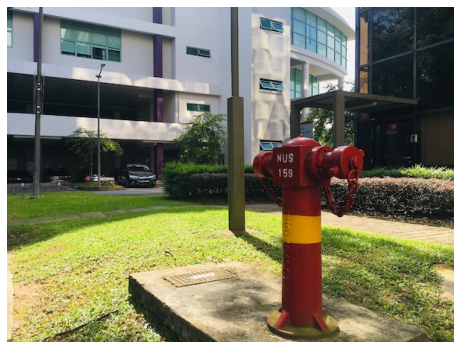

([[326.0, 165.0, 148, 274],
  [151.5, 209.5, 49, 33],
  [-1.0, 217.5, 36, 21],
  [43.5, 216.0, 45, 20]],
 ['fire hydrant', 'car', 'car', 'car'])

In [73]:
fboxes,fclasses=yoloV3Detect('sr3.jpg')
fboxes,fclasses

## **Question b**
---
Create a function that receives an image, `fboxes`, `fclasses` and `classes`, and produce the output in the below fashion.<br><br>

The name of the function should be `pltDetect`

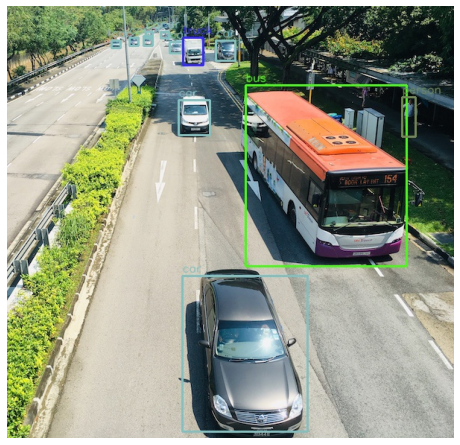

In [74]:
# Run the below to display the required type of output. The output below comes from image "sr6.jpg"

cv2plt(cv2.imread('wks3_3_b.jpg'))

In [75]:
# Type your code below

def pltDetect(img,fboxes,fclasses,classes):

  ######################### Read Image ##########################
  img = cv2.imread(img)

  ################# Color map for Plotting ######################
  colorset = np.random.uniform(0, 255, size=(len(classes),3))
  c_map ={}
  s = set(fclasses)
  
  for i in range(len(s)):
    c_map[list(s)[i]]=colorset[i]

  ########################### Plotting #############################
  for i,j in zip(fboxes,fclasses): 
    box = i
    txtlbl = j
    color = c_map[j]
    x = int(box[0]) 
    y = int(box[1]) 
    w = int(box[2]) 
    h = int(box[3])
    cv2.rectangle(img, 
                  (x,y), 
                  (x+w,y+h), 
                  color, 
                  2) 
    cv2.putText(img, 
    txtlbl, 
    (x,y-5), 
    cv2.FONT_HERSHEY_SIMPLEX, 
    0.5, 
    color, 
    1, 
    cv2.LINE_AA)

  cv2plt(img)

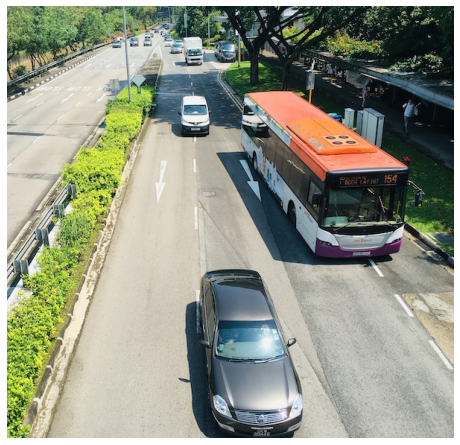

{'car', 'truck', 'bus', 'person'}


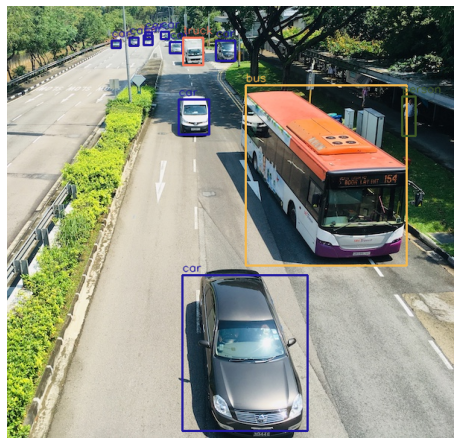

In [77]:
img = 'sr6.jpg'
fboxes,fclasses=yoloV3Detect(img)
print(set(fclasses))
pltDetect(img,fboxes,fclasses,classes)